# Data  Challenge

`In this project, we put together a recommendation for a maintenance program based on ride history for a group
of Birds in Los Angeles.`

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_excel('/Users/aoranzhang/Desktop/Data Analyst- rides.xlsx',header=1)

# Data Exploration

`Frist, we conduct data exploration to get familiar with data and understand the relationship between features and ride_triggered_maintenance.`

*<h2> Data Shape</h3>*

In [4]:
df.shape

(50000, 11)

In [81]:
df.count()

bird_id                       50000
bird_model_id                 50000
start_odometer                50000
end_odometer                  50000
start_timestamp               50000
end_timestamp                 50000
rider_id                      50000
rider_age                     50000
ride_rating                   50000
ride_neighborhood             50000
ride_triggered_maintenance    50000
dtype: int64

`There are 50000 observations and 11 features in the data. There is no missing value.`

*<h2> Data Range</h2>*

In [5]:
#data date range
import datetime

In [6]:
pd.Timestamp(min([datetime.datetime.fromtimestamp(i) for i in df.start_timestamp ]))

Timestamp('2018-03-31 17:28:15')

In [7]:
pd.Timestamp(max([datetime.datetime.fromtimestamp(i) for i in df.end_timestamp ]))

Timestamp('2018-04-16 01:30:27')

`Date range of the data is from 2018-03-31 17:28:15 to 2018-04-16 01:30:27.`

*<h2> New Scooter or used scooter when 1st use</h2>*

In [8]:
sum(df.groupby('bird_id')['start_odometer'].min())

0.0

`All the scooters are new when they put into use.`

*<h2> Scooter Ride Frequency</h2>*

In [9]:
import collections as cls
import seaborn as sns
import matplotlib.pyplot as plt  

In [10]:
len(df.bird_id.unique()) 

500

`There are 500 scooters in use. They are used from 75 to 126 times`

In [11]:
#frequency of scooter use
cls.Counter(df.bird_id).most_common()

[(395, 126),
 (442, 123),
 (215, 122),
 (73, 122),
 (282, 121),
 (10, 121),
 (29, 120),
 (92, 79),
 (87, 79),
 (484, 79),
 (349, 78),
 (212, 78),
 (156, 75)]

*<h2> Scooter Model</h2>*

In [13]:
#frequency of model 
models=pd.DataFrame(cls.Counter(df.bird_model_id).most_common())
models.columns=['model','counts']

In [14]:
plt.pie(models.counts, labels=models.model, 
        autopct='%1.1f%%', shadow=False, startangle=90,radius=2)
plt.axis('equal')

(-2.226884493208849, 2.24257376610948, -2.223765916424519, 2.201131794717657)

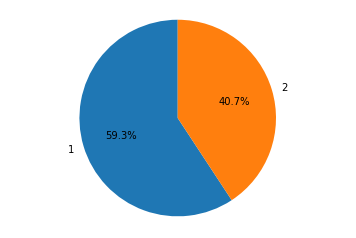

In [15]:
plt.show()

`There are 59.3% of rides are with model 1 and 40.3% with model 2 overall.`

In [16]:
## count model by ride_triggered_maintenance
models_F=pd.DataFrame(cls.Counter(df.bird_model_id[df.ride_triggered_maintenance==False]).most_common())
models_F.columns=['model','counts']
models_T=pd.DataFrame(cls.Counter(df.bird_model_id[df.ride_triggered_maintenance==True]).most_common())
models_T.columns=['model','counts']

*<h3>Facet by ride_triggered_maintenance</h3>*

In [17]:
## get pie chart of model
sns.set(font_scale=1)

In [18]:
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(models_F.counts, labels=models_F.model, 
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.title('No Maintenance Needed')

Text(0.5,1,'No Maintenance Needed')

In [19]:
ax1 = plt.subplot2grid((1,2),(0,1))
plt.pie(models_T.counts, labels=models_T.model, 
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.title('Maintenance Needed')

Text(0.5,1,'Maintenance Needed')

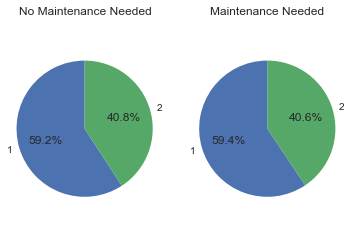

In [20]:
plt.show()

`Distribution of bird model when faceting by 'ride_triggered_maintenance' is very similiar to the overall model distibution.`

*<h2> Scooter End Odometer</h2>*

In [22]:
##distribution of end_odometer
min(df.end_odometer),max(df.end_odometer)

(1.14, 2985.71)

In [23]:
sns.distplot(df.end_odometer)
plt.title('End Odometer')

Text(0.5,1,'End Odometer')

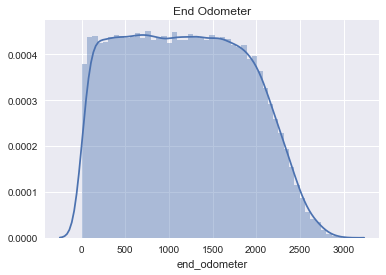

In [24]:
plt.show()

`End odometer for the rides are from 1.14 to 2985.71 miles. Majority of rides end from 1.14 to 2000 miles`.

*<h3>Facet by ride_triggered_maintenance</h3>*

In [25]:
sns.set(font_scale=1.6)
g = sns.FacetGrid(df, col="ride_triggered_maintenance", aspect=1,size=6,sharey=True,ylim=(0,0.0006))
g.map(sns.distplot, "end_odometer")

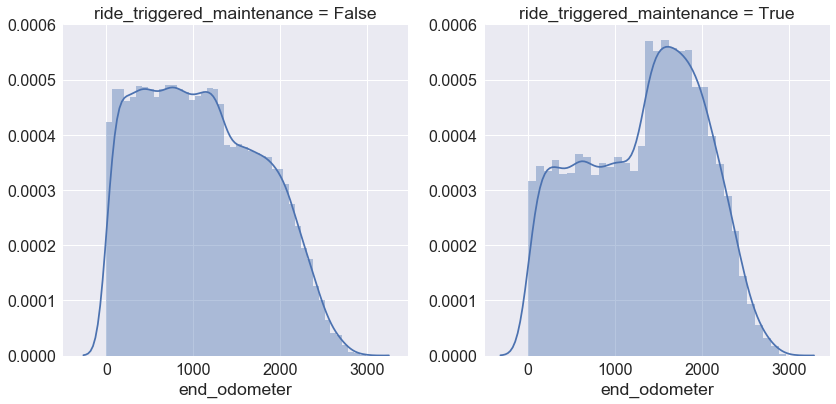

In [26]:
plt.show()

`Scooters need maintenaince have generally higher end odometer.`

*<h2> Rider Age</h2>*

In [27]:
#age range
min(df.rider_age),max(df.rider_age)

(18, 65)

In [28]:
sns.set(font_scale=1.6)
age = sns.FacetGrid(df, col="ride_triggered_maintenance", aspect=1,size=5,sharey=True)
age.map(sns.distplot, "rider_age",bins=6)

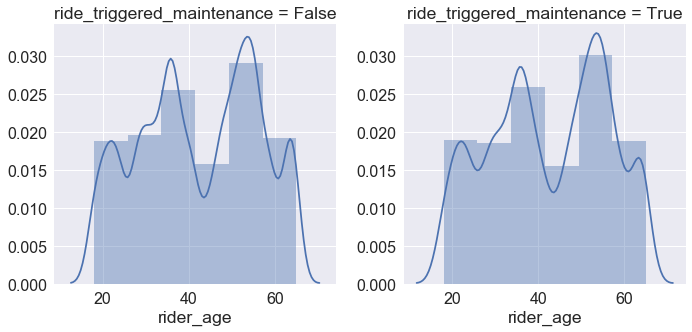

In [29]:
plt.show()

`Age distribution are similiar for the two groups. There are more riders aged from 34-42 and 50-58. Seems that middle aged people are more willing to use scooters than young adults.  `

*<h2> Rating</h2>*

In [30]:
#get raing counts
Rate_F=pd.DataFrame(cls.Counter(df.ride_rating[df.ride_triggered_maintenance==False]).most_common())
Rate_F.columns=['rate','counts']
Rate_T=pd.DataFrame(cls.Counter(df.ride_rating[df.ride_triggered_maintenance==True]).most_common())
Rate_T.columns=['rate','counts']

In [31]:
sns.set(font_scale=1.3)
f, axs = plt.subplots(2,2,figsize=(10,7))
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(Rate_F.counts, labels=Rate_F.rate, 
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.title('No Maintenance Needed')

ax1 = plt.subplot2grid((1,2),(0,1))
plt.pie(Rate_T.counts, labels=Rate_T.rate, 
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.title('Maintenance Needed')

Text(0.5,1,'Maintenance Needed')

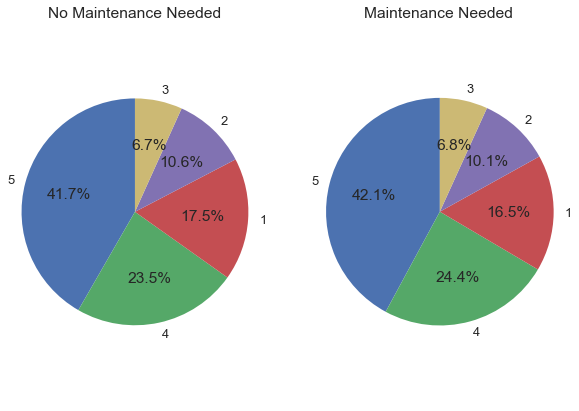

In [32]:
plt.show()

`There is not obvious difference in rating distribution, nearly 50% percent of riding get score 4 or 5. One possible guess is that the scooters will trigger maintenance after ride so the riders will still get a well functional scooter during the ride. Thus, they will give a good rating. `

*<h2> Area of Riding</h2>*

In [33]:
cls.Counter(df.ride_neighborhood)

Counter({'brentwood': 4397,
         'culver city': 4461,
         'downtown': 4650,
         'echo park': 4613,
         'hollywood': 4512,
         'pasadena': 4554,
         'playa vista': 4498,
         'santa monica': 4533,
         'ucla': 4592,
         'venice': 4655,
         'west hollywood': 4535})

`Riders use scooters in 11 cities and each cities have close number of rides.`

# Feature Engineering

`In this session, we will derive some additional features based on the data.`

In [38]:
df1=df.sort_values(['bird_id','start_odometer']) # put the riding with same bird_id together and order by start_odometer.

 *<h2> Days In use -- How many days the scooter is used so far </h2>*

`Days in use measures how long the scooters avaliable to use including both the service time and idle time. `

`Days in use is the difference between current date and the first day the scooter is used.`

In [39]:
#start time of each scooter
starts=pd.DataFrame(df1.groupby('bird_id')['start_timestamp'].min())

In [40]:
starts['bird_id']=starts.index

In [41]:
#join the start time of scooter to the table
df1=df1.join(starts,on='bird_id',rsuffix='_min')

In [42]:
#calculate timestamo difference and convert to days.
df1['day_in_use']=(df1.end_timestamp-df1.start_timestamp_min)*1.0/3600/24

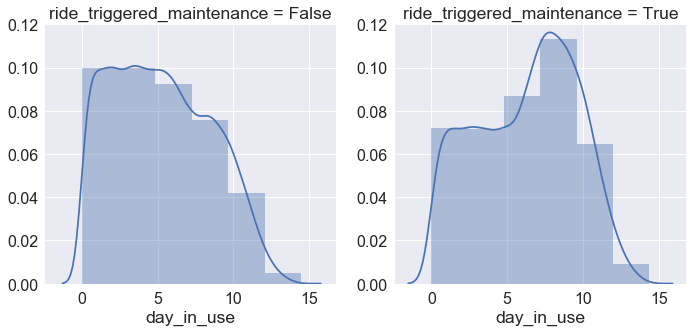

In [43]:
sns.set(font_scale=1.6)
p = sns.FacetGrid(df1, col="ride_triggered_maintenance", aspect=1,size=5,ylim=(0,0.12))
p.map(sns.distplot, "day_in_use",bins=6)
plt.show()

`The scooters are put in use from 0-15 days when the ridings are recorded. There are larger proportion of scooters with longer day_in_use in the maintainence triggered group. Proportion of scooters used over 7 days is much higer in maintainence triggered group than that of the other group. `

 *<h2> Trip Length per Ride -- How far the rider travel per time </h2>*

In [44]:
#odometer per time
df1['trip_length']=df1.end_odometer-df1.start_odometer

In [45]:
(min(df1['trip_length']),max(df1['trip_length'])) #range

(1.0, 45.0)

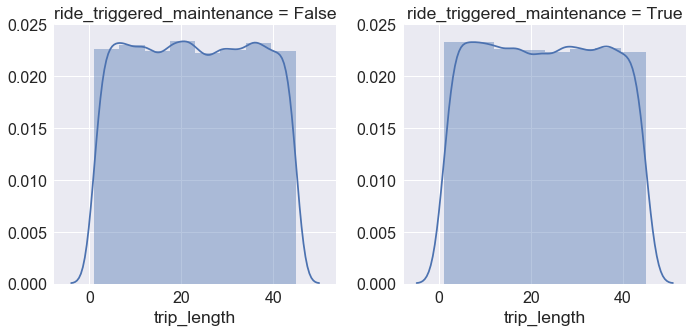

In [46]:
sns.set(font_scale=1.6)
p = sns.FacetGrid(df1, col="ride_triggered_maintenance", aspect=1,size=5,ylim=(0,0.025))
p.map(sns.distplot, "trip_length",bins=8)
plt.show()

`Each ride last for 1 to 45 miles. The distribution of trip length per ride have no significant difference between the two groups.`

 *<h2> Trip Duration per Ride -- How long per ride last for </h2>*

In [47]:
#trip time, from start to end timestamp, in hour
df1['trip_duration']=round((df1.end_timestamp-df1.start_timestamp)/3600,2)

In [48]:
(min(df1['trip_duration']),max(df1['trip_duration']))

(0.04, 8.89)

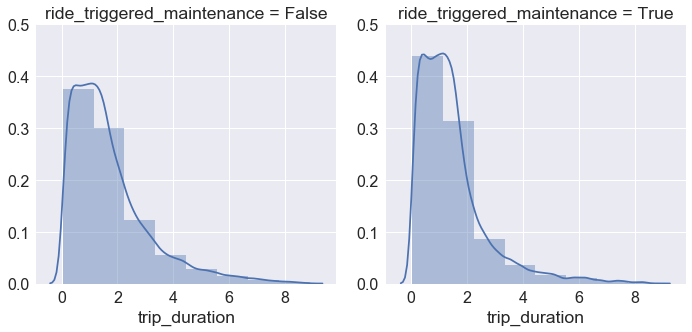

In [49]:
sns.set(font_scale=1.6)
p = sns.FacetGrid(df1, col="ride_triggered_maintenance", aspect=1,size=5,ylim=(0,0.5))
p.map(sns.distplot, "trip_duration",bins=8)
plt.show()

`Each ride will last for 0.04 to 8.89 hours. There is slight difference in the trip_duration distribution between the two groups. More scooters are used for a shorter time per ride among those triggered maintenance. There is a higher percent of scooters used less than 2 hours per ride in the maintenaince triggered group.`

 *<h2> Total Duration -- How long the scooter in use in total </h2>*

In [50]:
df1['total_duration']=df1.groupby('bird_id')['trip_duration'].cumsum()

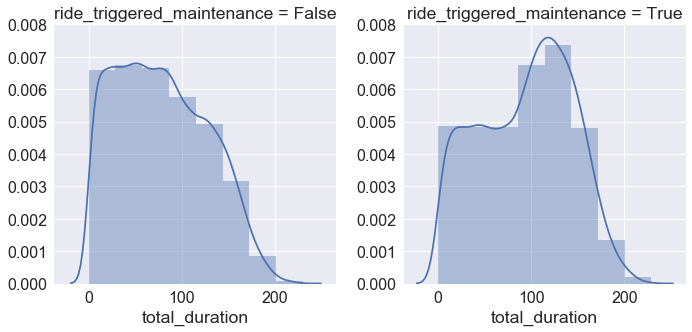

In [51]:
sns.set(font_scale=1.6)
p= sns.FacetGrid(df1, col="ride_triggered_maintenance", aspect=1,size=5,ylim=(0,0.008))
p.map(sns.distplot, "total_duration",bins=8)
plt.show()

`For scooters have not triggered maintenance, more of them are used for 0-100 hours in total. But for those triggered maintenance, more are used from 100 - 200 hours. `

*<h2> Duration and Total Trip length from Last Maintenance </h2>*

`The condition to trigger maintenance might change if the scooter has been maintained before. So we calculate several metrics since it last maintained.`

### Decide whether the scooter is maintained

`For scooter j, if the ith ride shows ride_triggered_maintenance='True' and (i+1)th record shows ride_triggered_maintenance='False', then the scooter j was maintained after the ith ride.`

In [52]:
df1.index=range(len(df1))

In [53]:
temp=[]
##except the last record, determine whether maintained based on these criterion.
##for the last record, will not have opportunity to be maintained.
for i in range(df1.shape[0]-1):
    if (df1.ride_triggered_maintenance[i]==True) and (df1.ride_triggered_maintenance[i+1]==False) and (df1.bird_id[i]==df1.bird_id[i+1]):
        temp.append(1)
    else:
        temp.append(0)
temp.append(0)      

In [54]:
df1['maintain_fg']=temp

### Get index of last maintainence record

`Then, for scooter j, we get the index of the last maintainence record for each ride. For the ith record, if the      
(i-1)th record is maintained, then the index of the last maintainence record is (i-1). Otherwise, last maintainence record of ith ride will be the same as that of (i-1)th ride.`

In [55]:
##last record maintained 
df1['maintain_record']=np.nan

In [56]:
## for new scooter, the maintain record is itself
df1['maintain_record'][df1.start_odometer==0]=df1.index

/Users/aoranzhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [57]:
#get last maintain record of used scooter
for i in range(1,len(df1['maintain_record'])):
    if (df1.maintain_fg[i-1]==1) and (df1.start_odometer[i-1]!=0):
        df1['maintain_record'][i]=i-1


/Users/aoranzhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [58]:
df1['maintain_record']=df1['maintain_record'].fillna(method='ffill')

### Hours & Odometers since Last Maintenance

`For the new scooter, it is assigned as the difference between start and end timestamp. For the used scooter, we get it by the difference between current end_timestamp and end_timestamp of last maintenance.`

`Similarly to hours since last maintenance, for the new scooter, it is assigned as the difference between start and end odometer. For the used scooter, we get it by the difference between current end_odometer and end_odometer of last maintenance.`

In [59]:
#get hours
df1['hours_from_last_maintain']=df1.end_timestamp

In [60]:
for i in range(df1.shape[0]):
    if df1.start_timestamp_min[i]==df1.start_timestamp[i]:
        df1['hours_from_last_maintain'][i]=(df1.end_timestamp[i]-df1.start_timestamp_min[i])*1.0/3600
    else:
        df1['hours_from_last_maintain'][i]=(df1.end_timestamp[i]-df1.end_timestamp[df1['maintain_record'][i]])*1.0/3600

/Users/aoranzhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aoranzhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [62]:
#get odometer
df1['odometer_from_last_maintain']=df1.end_odometer

In [66]:
#if not new, then get odometer since last maintain. If new, get the 1st trip length
for i in range(df1.shape[0]):
    if df1.start_timestamp_min[i]!=df1.start_timestamp[i]:
        df1['odometer_from_last_maintain'][i]=(df1.end_odometer[i]-df1.end_odometer[df1['maintain_record'][i]])

/Users/aoranzhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


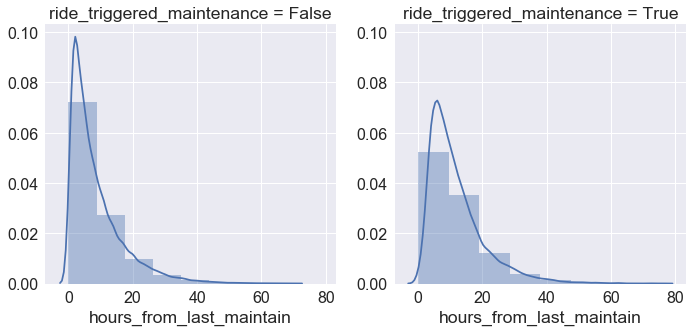

In [61]:
sns.set(font_scale=1.6)
p = sns.FacetGrid(df1, col="ride_triggered_maintenance", aspect=1,size=5)
p.map(sns.distplot, "hours_from_last_maintain",bins=8)
plt.show()

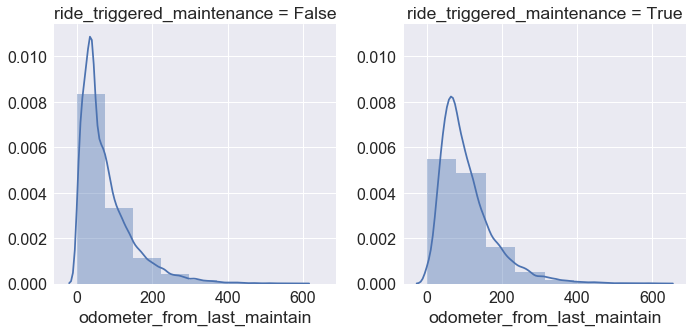

In [70]:
sns.set(font_scale=1.6)
p = sns.FacetGrid(df1, col="ride_triggered_maintenance", aspect=1,size=5)
p.map(sns.distplot, "odometer_from_last_maintain",bins=8)
plt.show()

`Scooters that have not triggered maintenance are usually maintained more recently. There are larger proportion of trigger maintenance have larger odometer and service hours after the last maintenance.`

# Conclusion from Data Exploration and Feature Engineering

` The maintenance is easy to be triggered when end odometer, day in use and total trip duration are longer. Besides, the scooter recently maintained are less likely to trigger maintenance.`

# Decision Tree Model

`We use decision tree model to forecast whether the scooter will trigger maintenance based on the current condition.
Based on the model, we can also quantify the influence of the features`.

*<h2> Variable Selection</h2>*

In [75]:
#Select for X
X=df1.drop(['bird_id','start_odometer','start_timestamp','end_timestamp','rider_id','ride_neighborhood',
            'start_timestamp_min','bird_id_min','maintain_fg','maintain_record','ride_triggered_maintenance'],axis=1)

In [76]:
X.columns

Index(['bird_model_id', 'end_odometer', 'rider_age', 'ride_rating',
       'day_in_use', 'trip_length', 'trip_duration', 'total_duration',
       'hours_from_last_maintain', 'odometer_from_last_maintain'],
      dtype='object')

In [79]:
Y=[1 if i==True  else 0 for i in df1.ride_triggered_maintenance ]

In [86]:
sum(Y)/len(Y)

0.30832

`30.82% of the scooters trigger maintenance after riding.`

*<h2> Data Spliting</h2>*

`We split data into training and testing set. We will fit model with training set and test model with testing set.`

In [82]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split

/Users/aoranzhang/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [83]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size = 0.2, random_state = 0)

*<h2> Decision Tree Model Fitting</h2>*

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [85]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [181]:
#set parameter range
parameters = {'max_depth':[5,6,7], 'min_samples_split':[5000,10000,20000],'min_samples_leaf':[2500,5000,10000]}

In [182]:
Trees=GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid=parameters) #cv

In [183]:
Trees.fit(X_train,y_train) #model fittting

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 6, 7], 'min_samples_split': [5000, 10000, 20000], 'min_samples_leaf': [2500, 5000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [184]:
Trees.best_score_

0.716325

In [185]:
Trees.best_params_

{'max_depth': 5, 'min_samples_leaf': 2500, 'min_samples_split': 5000}

`The best model achieve a score as 0.716 and the best parameters are as above.`

*<h2> Decision Tree Model Validation</h2>*

`To evaluate the model, we use test set to scores and PR Curve .`

In [186]:
best_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=2500,min_samples_split=5000)

In [187]:
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2500, min_samples_split=5000,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [188]:
from sklearn.metrics import classification_report
print(classification_report(y_test, best_tree.predict(X_test)))

             precision    recall  f1-score   support

          0       0.75      0.88      0.81      6934
          1       0.57      0.35      0.43      3066

avg / total       0.70      0.72      0.70     10000



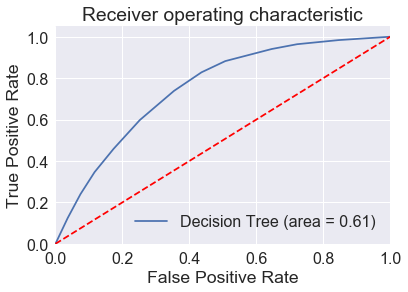

In [189]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, best_tree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, best_tree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

`Test model can achieve F1 score as 0.7 and AUC as 0.61.`

*<h2> Feature Importance</h2>*

In [190]:
from skater import Interpretation
from skater.model import InMemoryModel
#create skater models for each model

#now lets create an interpretation object
interpreter = Interpretation(X_train, feature_names=X_train.columns)

In [191]:
model = InMemoryModel(best_tree.predict_proba, 
                          target_names=['No','Yes'], 
                          examples=X_train)

In [192]:
interpreter.feature_importance.plot_feature_importance(model, ascending=False)

[10/10] features ████████████████████ Time elapsed: 0 seconds

(<matplotlib.figure.Figure at 0x115738a58>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1618dbe80>)

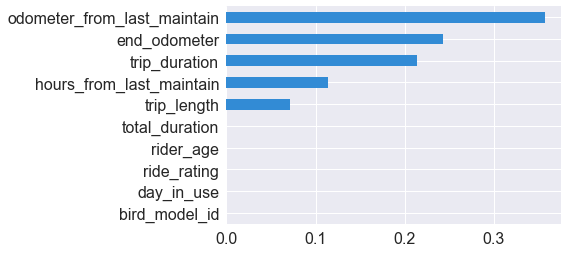

In [193]:
plt.show()

`There are 5 very important features to determine whether the scooter need maintenance.The most influential feature is odometer_from_last_maintain. Besides, we can conclude whether maintenance is needed replies more on how to rider use scooter after the last maintenance( how many odometers after maintenance and how far is the last maintenance) and the total journey of the scooter( cumulative odometer, duration used and length oof each trip.`

*<h2> Decision Tree Lay Out</h2>*

In [155]:
import graphviz
from sklearn import tree

In [179]:
dot_data = tree.export_graphviz(best_tree, out_file=None, 
                         feature_names=X_train.columns,  
                        class_names=['No','Yes'],
                         filled=True, rounded=True)

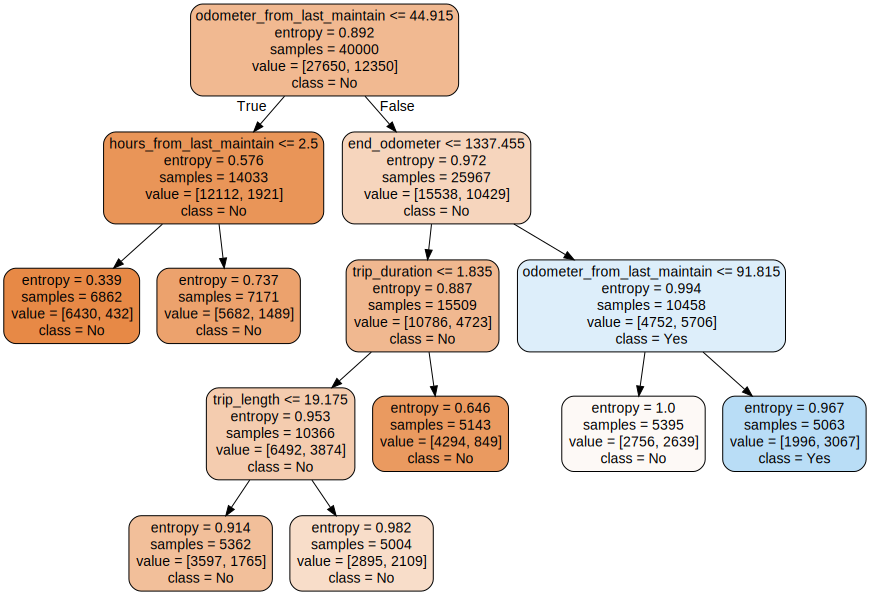

In [180]:
graphviz.Source(dot_data)

### Inference from the model

`If odometer_from_last_maintain <= 44.915 and hours_from_last_maintain <= 2.5, the scooters are more likely in good condition and no maintenance needed.`

`If odometer_from_last_maintain > 44.915 but end_odometer <= 1337.455 , the scooters might still in good condition since they are not used a lot and still good to use.`

`If odometer_from_last_maintain > 91.825, the scooters are more likely need maintenance.`

# Model Improvement

`There are different costs when we have false negative and positive. When we have false positive, we could just recall the scooter and take an examine. But if we have a false negative, we might put the user in danger and loss user in future. If we have estimate on the cost of false negative and positive. We can refine the loss function and get a better estimation`

`We can make more effort in data colletion. Precisely, we can add more features such as the maintenance information (what maintenance service the scooter received),road condition of journey and etc.`